In [80]:
import pandas as pd
import numpy as np

from pathlib import Path

import matplotlib.pylab as plt

In [107]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision

import torch

In [ ]:
INPUT_HEIGHT = 224

In [57]:
sample  = '../data/wiki_crop'

In [66]:
def generate_df(data_path):
    path = Path(sample)
    data = [(p, p.parent.name) for p in path.glob("**/*.jpg")]
    
    labels = [d[1] for d in data]
    filenames = [d[0] for d in data]
    data = pd.DataFrame({'image_path' : filenames,'label' : labels,})
    return data

In [68]:

data = generate_df("data/wiki_crop")


In [69]:
data

,image_path,label
0,..\data\wiki_crop\00\10049200_1891-09-16_1958.jpg,00
1,..\data\wiki_crop\00\10110600_1985-09-17_2012.jpg,00
2,..\data\wiki_crop\00\10126400_1964-07-07_2010.jpg,00
3,..\data\wiki_crop\00\1013900_1917-10-15_1960.jpg,00
4,..\data\wiki_crop\00\10166400_1960-03-12_2008.jpg,00
...,...,...
62323,..\data\wiki_crop\99\9799_1960-06-22_2012.jpg,99
62324,..\data\wiki_crop\99\9811999_1953-06-14_2004.jpg,99
62325,..\data\wiki_crop\99\981199_1954-12-30_2006.jpg,99
62326,..\data\wiki_crop\99\9863599_1948-08-13_1963.jpg,99


In [255]:

from PIL import Image
from matplotlib import cm
import json
from PIL import Image
class ImageDataset(Dataset):
    """
    Class that creates dataset for training task
    Arguments: 
    img_dir - directory of all images
    df - dataframe with cleaned dataset
    transform - transform
    """
    def __init__(self, img_dir, df=None, transform=None):
        self.img_dir = img_dir
        self.df = df
        self.transform = transform

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        img_path = self.df["image_path"][idx]
        # print(img_path)
        # image = plt.imread(img_path)
        image = Image.open(img_path)
        
        #image = Image.fromarray((image)*255)
        # image = Image.fromarray(np.uint8((image)*255))
        if image.mode != 'RGB':
            image  = image.convert('RGB')
            # print(np.array(image).shape)
        if self.transform:
            # print('transforming image')
            image = self.transform(image)
            image = image.permute(1, 2, 0)
            # print(image.size())
        target = str(self.df['image_path'][idx])
        return image, target

In [256]:
img_dir = sample
BATCH_SIZE = 32

resize = transforms.Resize((224,224))
base_transform = transforms.Compose([resize,
        transforms.ToTensor()])

In [257]:
dataset = ImageDataset(img_dir, df = data, transform=base_transform)
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)


In [258]:
import collections
collections.Iterable = collections.abc.Iterable

In [259]:
img

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

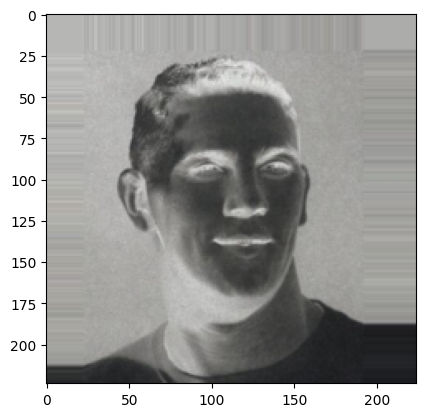

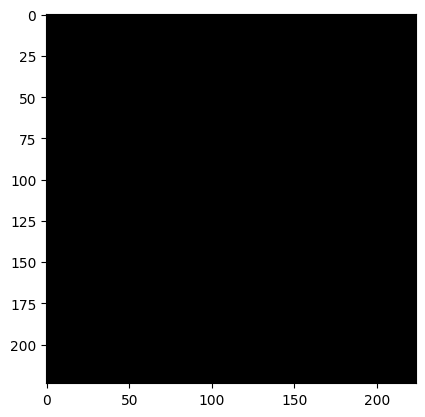

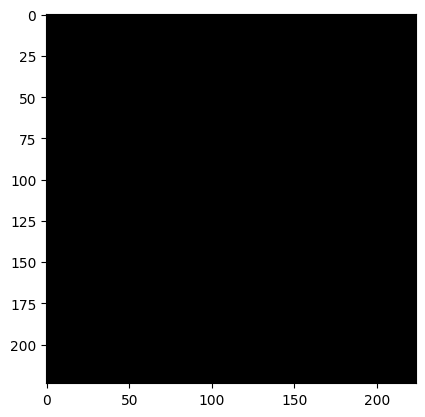

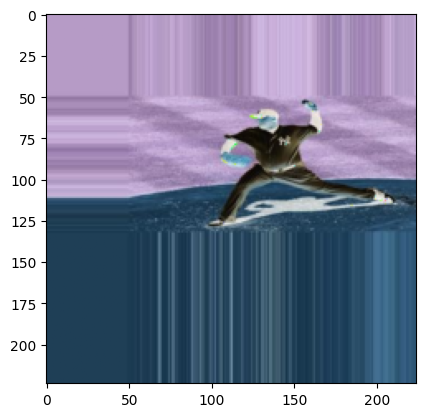

CPU times: total: 984 ms
Wall time: 664 ms


In [262]:
%%time
train_features, target = next(iter(data_loader))
for i in range(4):
    img = train_features[i].squeeze()
    plt.imshow(img)
    plt.show()